In [30]:
#Importing all necessary libraries required for HW-6

import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, roc_auc_score, auc
import numpy as np
import warnings
import pprint
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import LeaveOneOut, GridSearchCV,StratifiedKFold ,KFold
from sklearn.preprocessing import StandardScaler
!python -m pip install imblearn
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

***1(a). Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.***

In [2]:
aps_train_df = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values='na')
aps_test_df = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values='na')
print("Training Data Shape: ", aps_train_df.shape)
print("Testing Data Shape: ", aps_test_df.shape)

Training Data Shape:  (60000, 171)
Testing Data Shape:  (16000, 171)


In [3]:
aps_train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [4]:
aps_test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


**1(b). Data Preparation : This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea**

*1(b)-i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.*

Listing below some imputation techniques as shown in the official sklearn documentation - https://scikit-learn.org/stable/modules/impute.html

1. Univariate vs. Multivariate Imputation
2. Univariate feature imputation
3. Multivariate feature imputation
4. References
5. Nearest neighbors imputation
6. Marking imputed values
7. Estimators that handle NaN values

We are dealing with univariate data, so the general way to impute missing values for this data will be using mean, median, etc. In our case, we will make use of the mean to perform imputation for the missing data.

In [13]:
def split_predictors_and_response(data):
    predictors = data.iloc[:, 1:]
    response = data.iloc[:, 0:1]
    return predictors, response

In [14]:
aps_train_predictors, aps_train_response = split_predictors_and_response(aps_train_df)
aps_test_predictors, aps_test_response = split_predictors_and_response(aps_test_df)

print("APS Training Data Predictors Shape: ", aps_train_predictors.shape)
print("APS Training Data Response Shape: ", aps_train_response.shape)

print("APS Testing Data Predictors Shape: ", aps_test_predictors.shape)
print("APS Testing Data Response Shape: ", aps_test_response.shape)

APS Training Data Predictors Shape:  (60000, 170)
APS Training Data Response Shape:  (60000, 1)
APS Testing Data Predictors Shape:  (16000, 170)
APS Testing Data Response Shape:  (16000, 1)


In [15]:
def impute(df):
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    temp = imputer.fit_transform(df)
    imputedData = pd.DataFrame(temp, columns=df.columns)
    return imputedData

In [16]:
imputed_aps_train_predictors = impute(aps_train_predictors)
imputed_aps_test_predictors = impute(aps_test_predictors)

In [17]:
imputed_aps_train_predictors

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [18]:
imputed_aps_test_predictors

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


1(b)-ii. For each of the 170 features, calculate the coefficient of variation  𝐶𝑉=𝑠/𝑚, where 𝑠 is sample standard deviation and 𝑚 is sample mean.

In [19]:
def coefficient_of_variation(data):
    describe = data.describe(include='all')
    std = describe.loc['std']
    mean = describe.loc['mean']
    describe.loc['CV'] = std / mean
    return describe.loc[['std','mean','CV']]

In [20]:
cv_df = coefficient_of_variation(imputed_aps_train_predictors)
cv_df

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
std,145430.056532,1.660588,7.724678e+08,3.504515e+07,158.142022,205.375337,20363.631242,34008.750683,149479.100501,757459.796689,...,1.149060e+06,540272.166338,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,446989.425928,47204.242869,4.268529,8.627929
mean,59336.499567,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,221.636367,975.722261,8606.014529,88591.281094,...,4.454897e+05,211126.447302,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,138729.983179,8388.914629,0.090579,0.212756
CV,2.450938,2.328400,2.169767e+00,1.838476e+02,23.190937,18.658921,91.878565,34.854950,17.369143,8.550049,...,2.579319e+00,2.558998,2.606402e+00,2.829722e+00,3.192128e+00,4.962483e+00,3.222010,5.626979,47.124953,40.553250


1(b)-iii. Plot a correlation matrix for your features using pandas or any other tool.

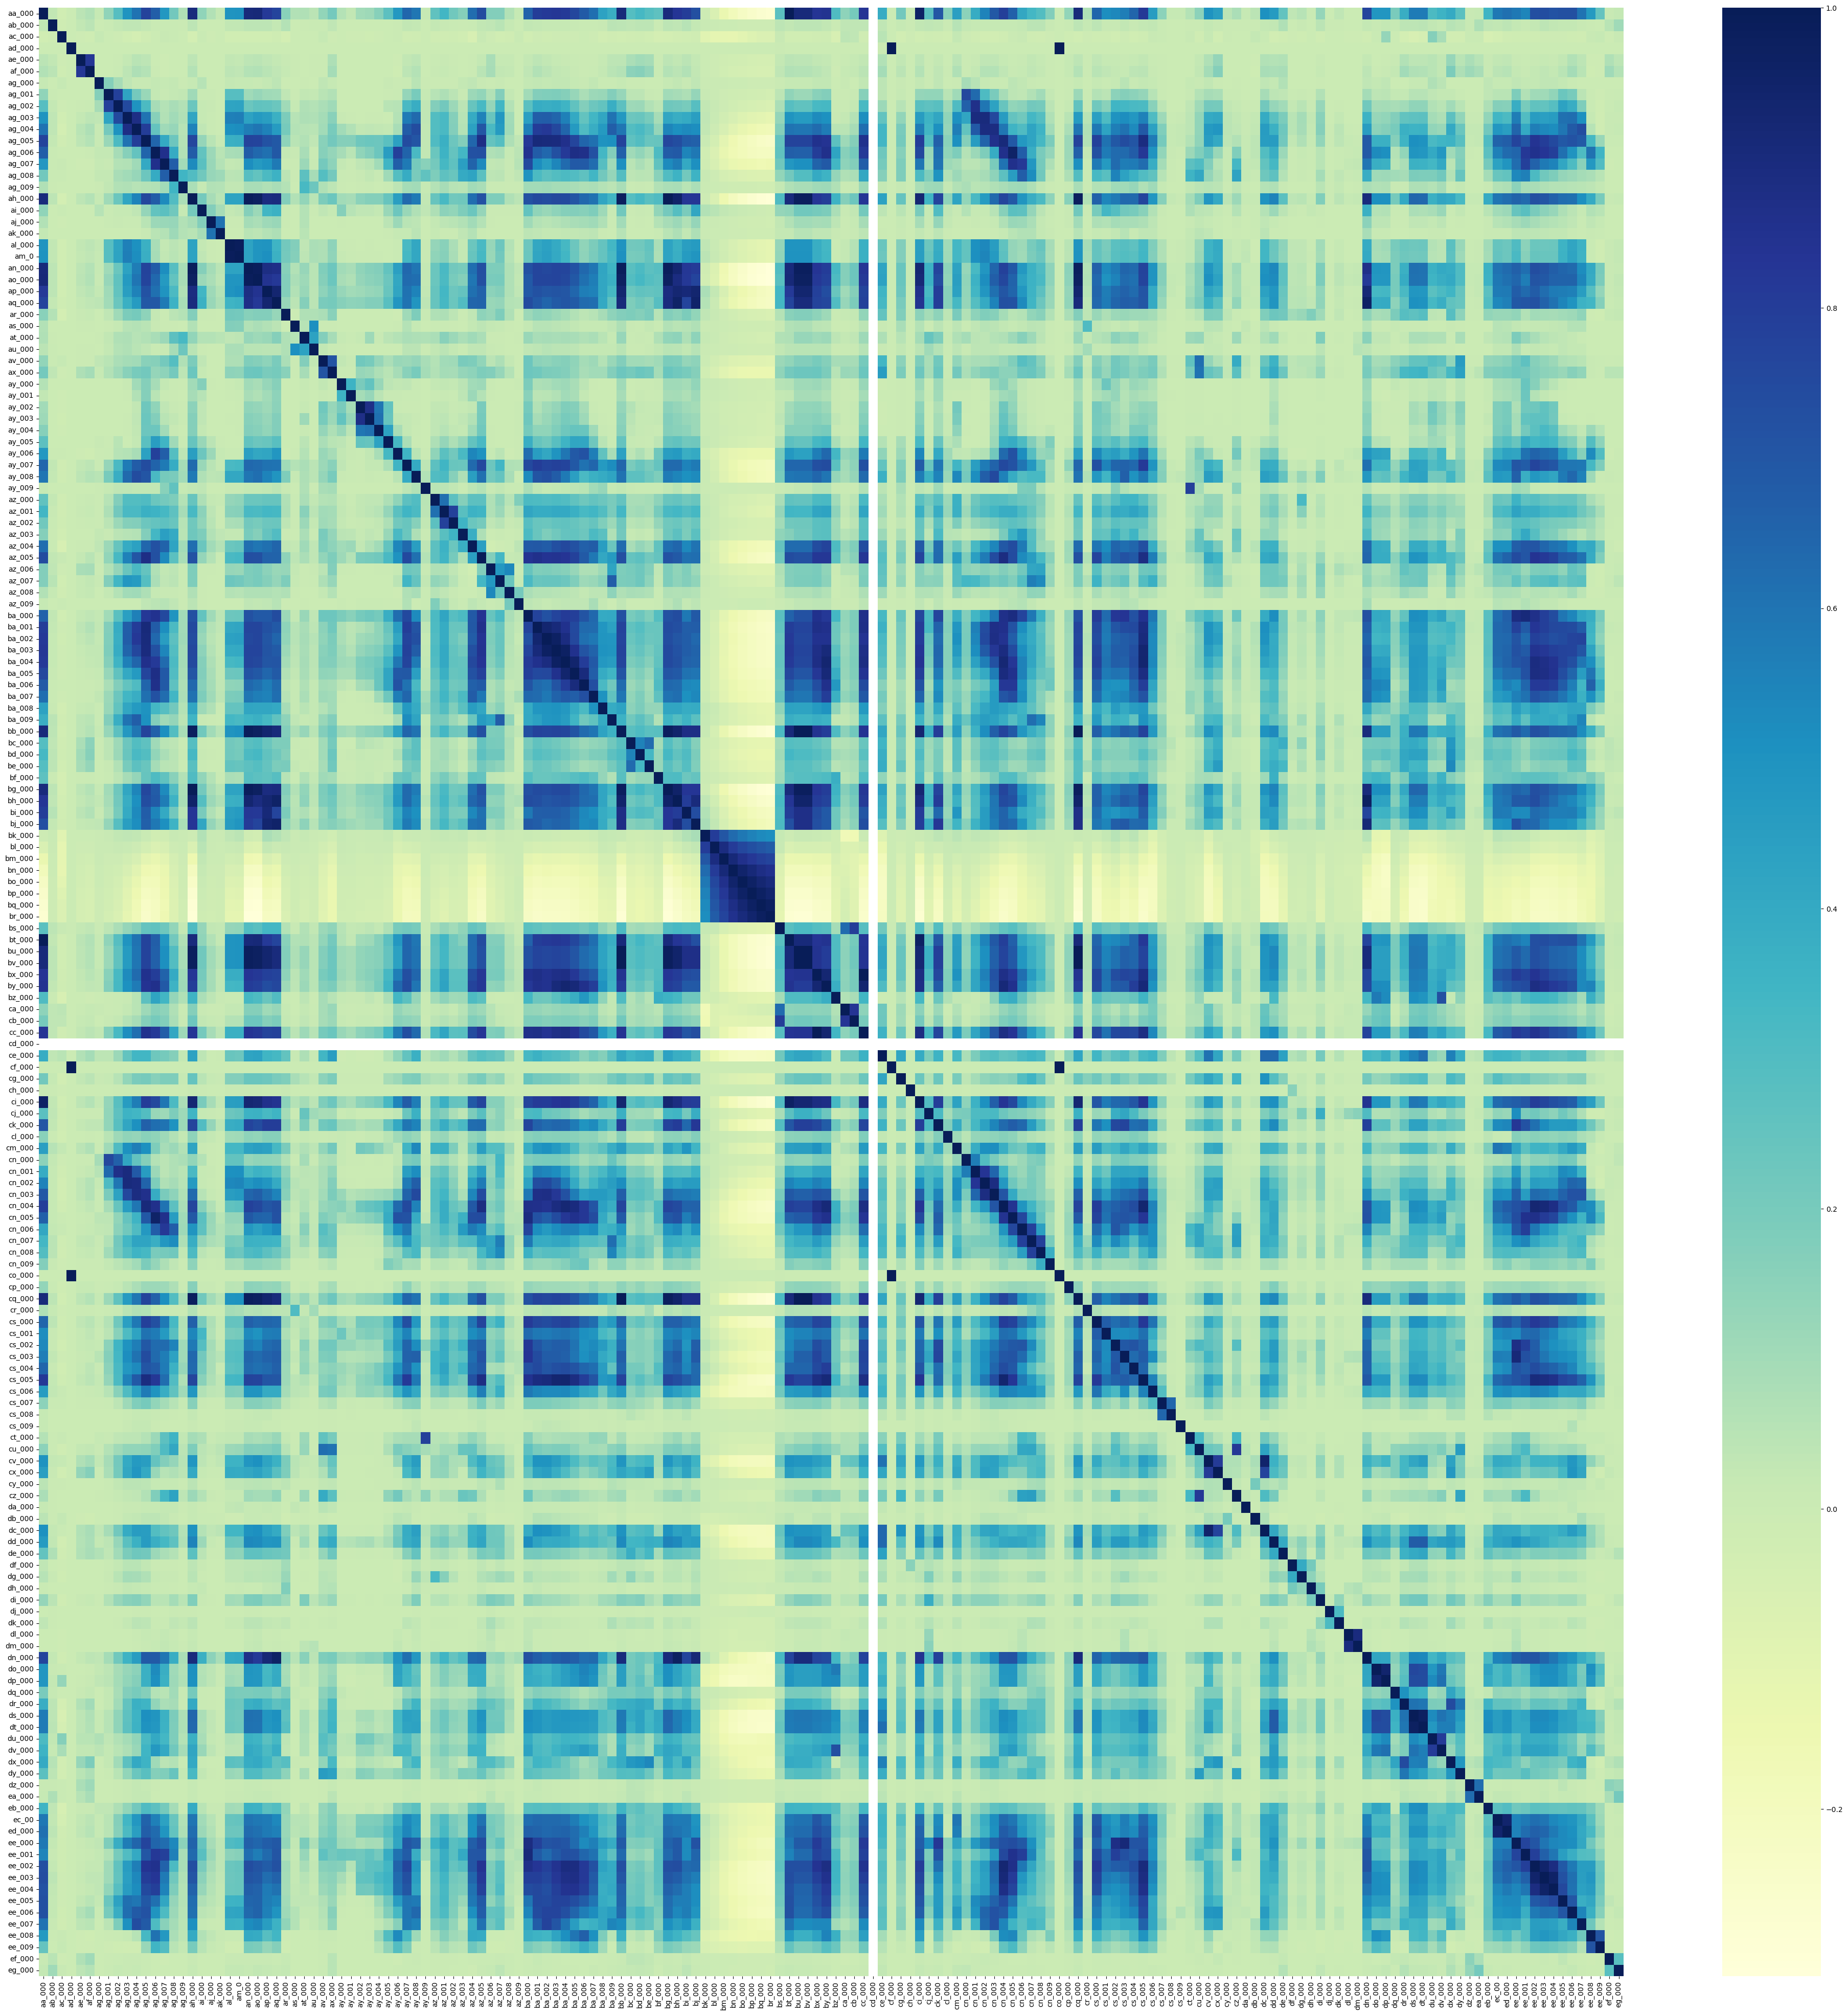

In [22]:
plt.figure(figsize=(50, 50))
corr = imputed_aps_train_predictors.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

1(b)-iv. Pick $\lfloor\sqrt{170}\rfloor$ features with highest  𝐶𝑉, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [23]:
# Predictors with decreasing order of CV
cv_df_sorted = cv_df.loc['CV'].sort_values(ascending=False)
highest_cv_features = cv_df_sorted[:int(np.sqrt(170))]
highest_cv_features

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
Name: CV, dtype: float64

In [24]:
def get_pairplot(df, top_cv_features):
    sns.pairplot(df[top_cv_features.index], diag_kind=None)
    plt.show()
    
def plot_box_plots(df):
    fig, axes = plt.subplots(figsize=(12, 7))
    box = sns.boxplot(data=df, ax=axes, orient='h')
    box.set(xscale="log")
    plt.plot()

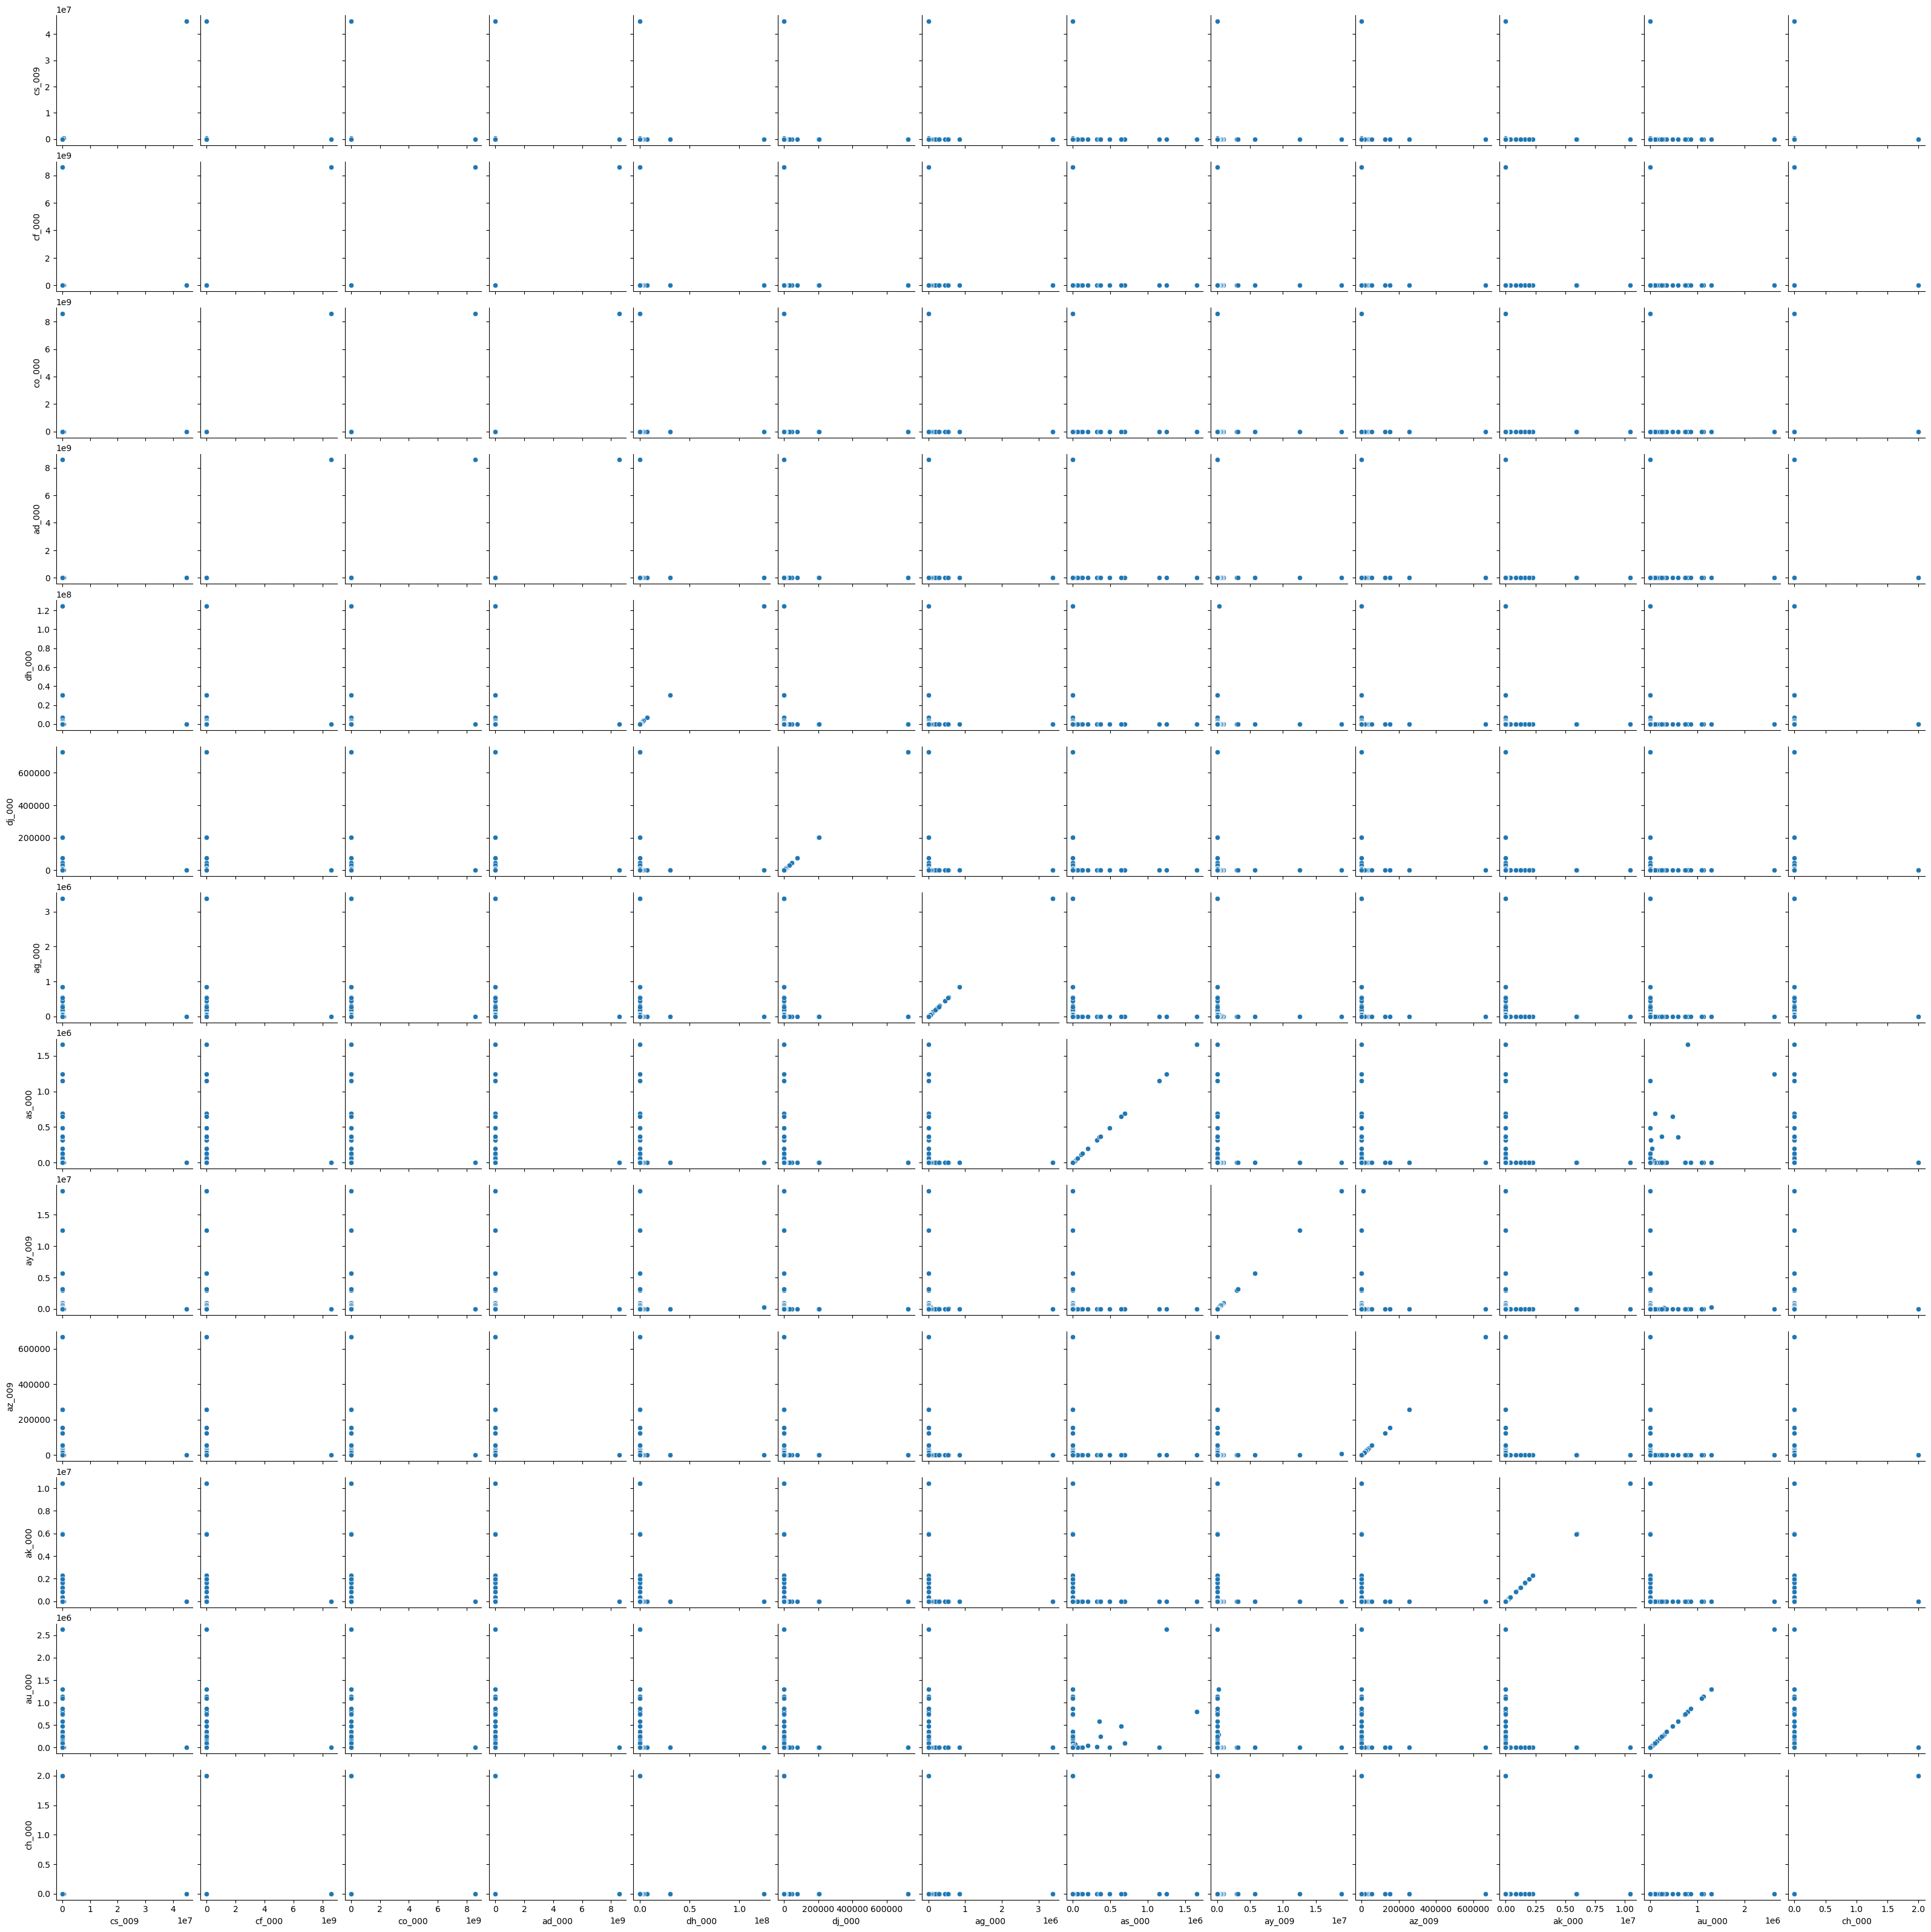

In [25]:
get_pairplot(imputed_aps_train_predictors, highest_cv_features)

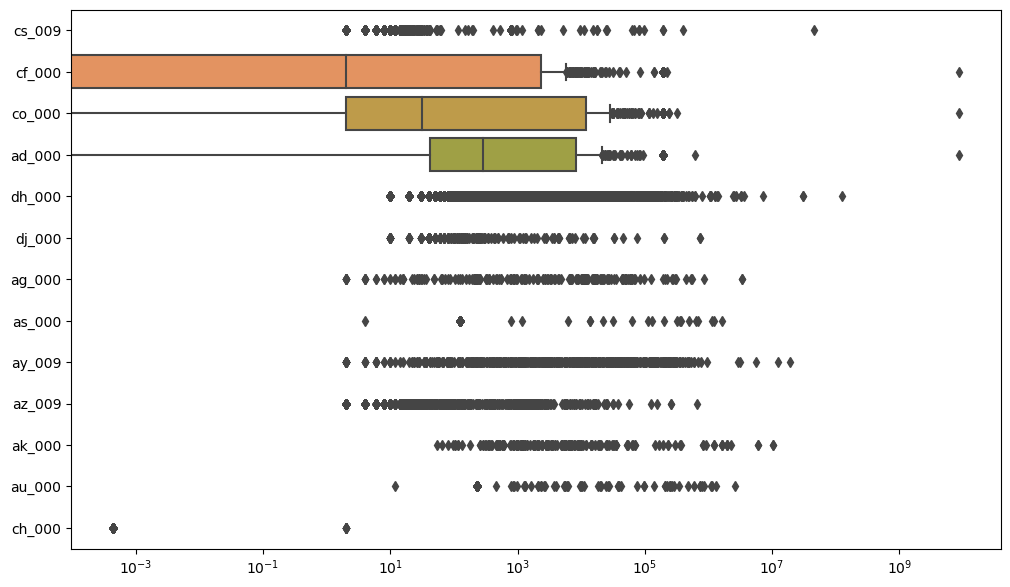

In [27]:
plot_box_plots(imputed_aps_train_predictors[highest_cv_features.index.to_list()])

**OBSERVATION : The scatteplots as seen above are truely scattered and hence no conclusion can be drawn solely from the scatterplots. We have used the imputation strategy as mean, so any outlier can easily affect the datapoint.**

1(b)-v. Determine the number of positive and negative data. Is this data set imbalanced?

In [28]:
aps_train_response.value_counts()

class
neg      59000
pos       1000
dtype: int64

In [29]:
aps_test_response.value_counts()

class
neg      15625
pos        375
dtype: int64

**Observation: We clearly observe that both the training and the testing set have highly imbalanced dataset.**

**1(c). Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forest and compare it to the test error.**

In [33]:
def AccuracyScore(ground_truth, predicted_truth):
    calculated_accuracy_score = accuracy_score(ground_truth, predicted_truth)
    print(f'Accuracy Score is: {round(calculated_accuracy_score, 4)}')
    print("\n")

def ConfusionMatrix(ground_truth, predicted_truth):
    conf_matrix = confusion_matrix(ground_truth, predicted_truth)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    print("\n")
    
def ROC_AUC_Score(ground_truth, predicted_truth):
    calculated_roc_auc_score = roc_auc_score(ground_truth, predicted_truth)
    print(f'ROC AUC Score is: {round(calculated_roc_auc_score, 4)}')
    print("\n")
    
# utility method to plot the ROC curve and AUC
def ROC_Curve(actualY, predictedY_prob, title, xgboost_mode=False):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"ROC curves for {title}")
    y_predicted = predictedY_prob[:, 1]
    if not xgboost_mode:
        fpr, tpr, thresholds = roc_curve(actualY, y_predicted, pos_label='pos')
    else:
        fpr, tpr, thresholds = roc_curve(actualY, y_predicted)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()
    
def RandomForest(data_x, data_y, is_balanced=False):
    if not is_balanced:
        RF_model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          oob_score=True)
    else:
        RF_model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          class_weight='balanced',
                                          oob_score=True)
    RF_model.fit(data_x, data_y)
    return RF_model

def ModelSummary(ground_truth, predicted_truth, prob, title, xgboost_mode=False):
    AccuracyScore(ground_truth, predicted_truth)
    ConfusionMatrix(ground_truth, predicted_truth)
    if xgboost_mode:
        ROC_AUC_Score(ground_truth, predicted_truth)
    ROC_Curve(ground_truth, prob, title, xgboost_mode)

Accuracy Score is: 0.992


Confusion Matrix is: 
[[58972    28]
 [  450   550]]




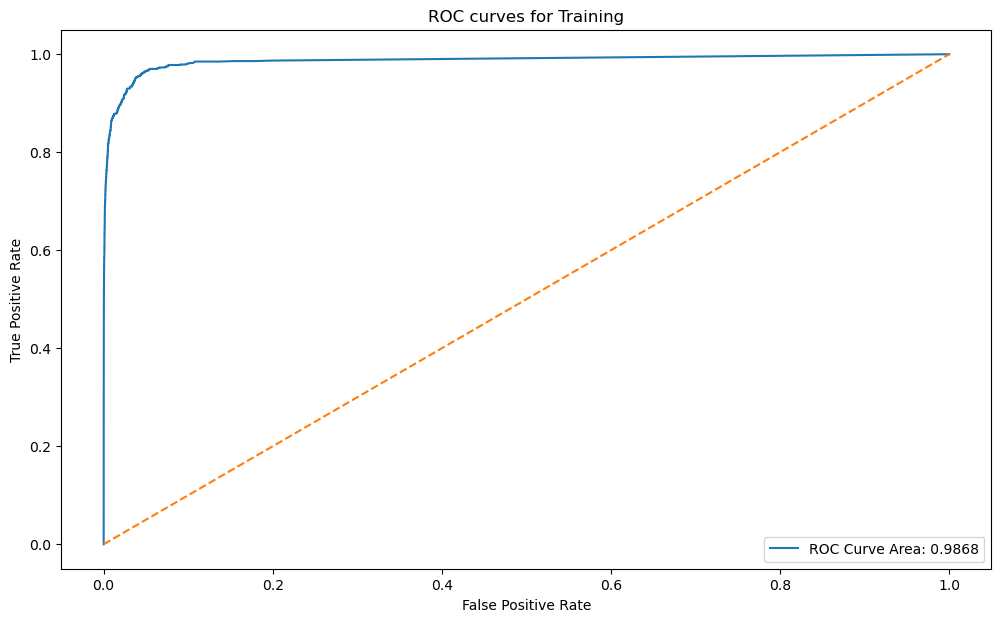

In [34]:
RF_model = RandomForest(imputed_aps_train_predictors, aps_train_response)
aps_train_predicted_response = RF_model.predict(imputed_aps_train_predictors)
aps_train_y_prob = RF_model.predict_proba(imputed_aps_train_predictors)
ModelSummary(aps_train_response, aps_train_predicted_response, aps_train_y_prob, "Training")

Accuracy Score is: 0.9879


Confusion Matrix is: 
[[15612    13]
 [  180   195]]




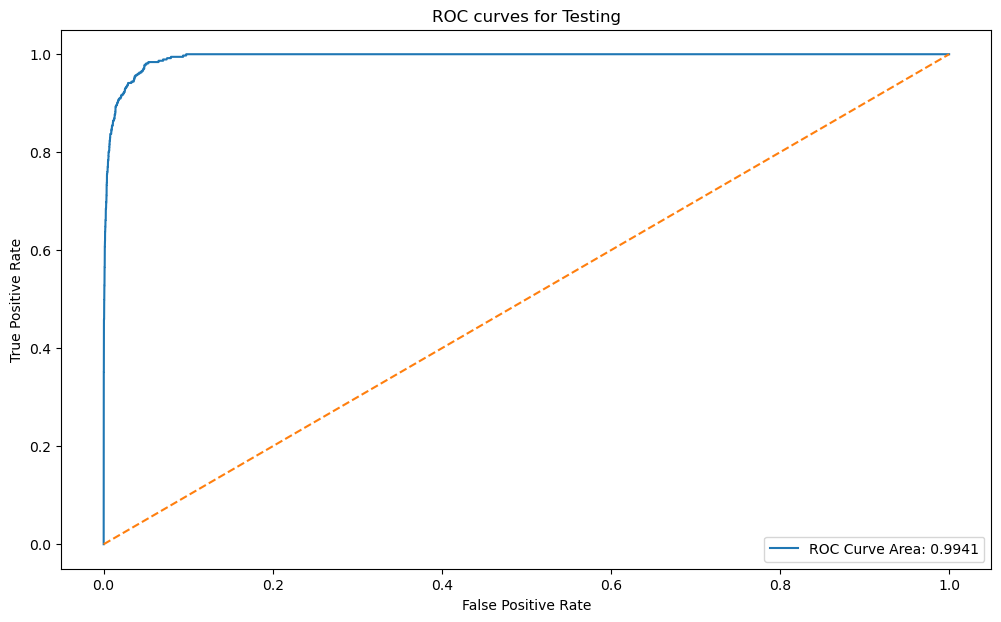

In [36]:
aps_test_predicted_response = RF_model.predict(imputed_aps_test_predictors)
aps_test_y_prob = RF_model.predict_proba(imputed_aps_test_predictors)
ModelSummary(aps_test_response, aps_test_predicted_response, aps_test_y_prob, "Testing")

In [37]:
# Calculating Out Of Bag Error
train_oob_error = 1 - RF_model.oob_score_
test_error = 1 - accuracy_score(aps_test_response, aps_test_predicted_response)

data = {
    'Training OOB Error': [round(train_oob_error, 4)],
    'Testing Error': [round(test_error, 4)]
}
data = pd.DataFrame(data=data)
data

,Training OOB Error,Testing Error
0,0.0094,0.0121


**1(d). Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.**

**Analysis -->**
We can handle class imbalance using 2 ways :
 - RandomForestClassifier with class_weight='balanced' = Weights associated with classes in the form {class_label: weight}. Default weight considered is 1 for all classes if not explicitly mentioned.
 - BalancedRandomForestClassifier = A balanced random forest classifier. It randomly under-samples each boostrap sample to balance it.

We will be implementing the first approach - RandomForestClassifier

Accuracy Score is: 0.9589


Confusion Matrix is: 
[[56563  2437]
 [   31   969]]




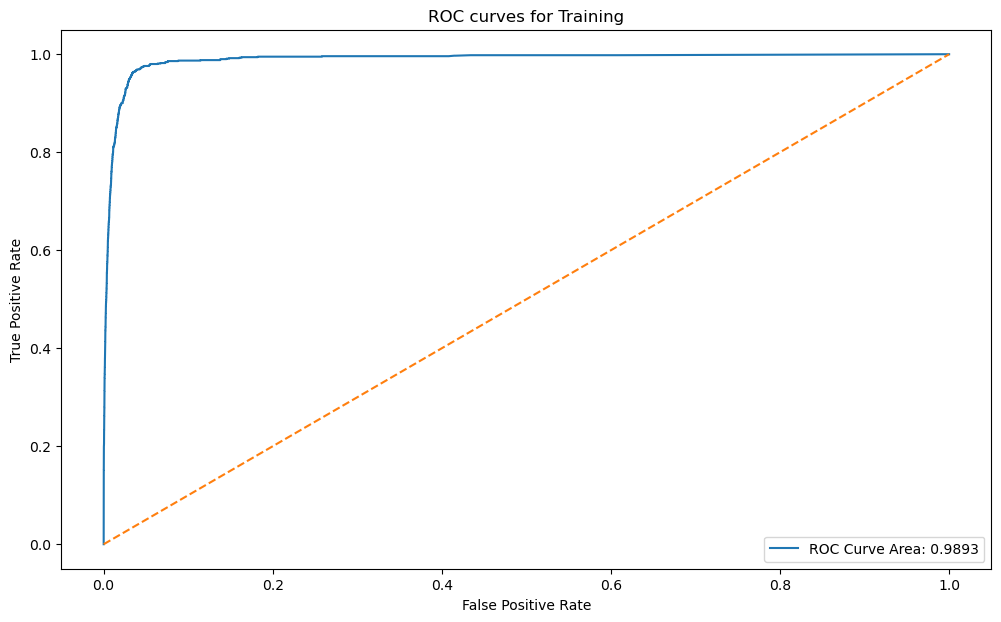

In [38]:
RF_model = RandomForest(imputed_aps_train_predictors, aps_train_response, is_balanced=True)
aps_train_predicted_response = RF_model.predict(imputed_aps_train_predictors)
aps_train_y_prob = RF_model.predict_proba(imputed_aps_train_predictors)
ModelSummary(aps_train_response, aps_train_predicted_response, aps_train_y_prob, "Training")

Accuracy Score is: 0.9595


Confusion Matrix is: 
[[14992   633]
 [   15   360]]




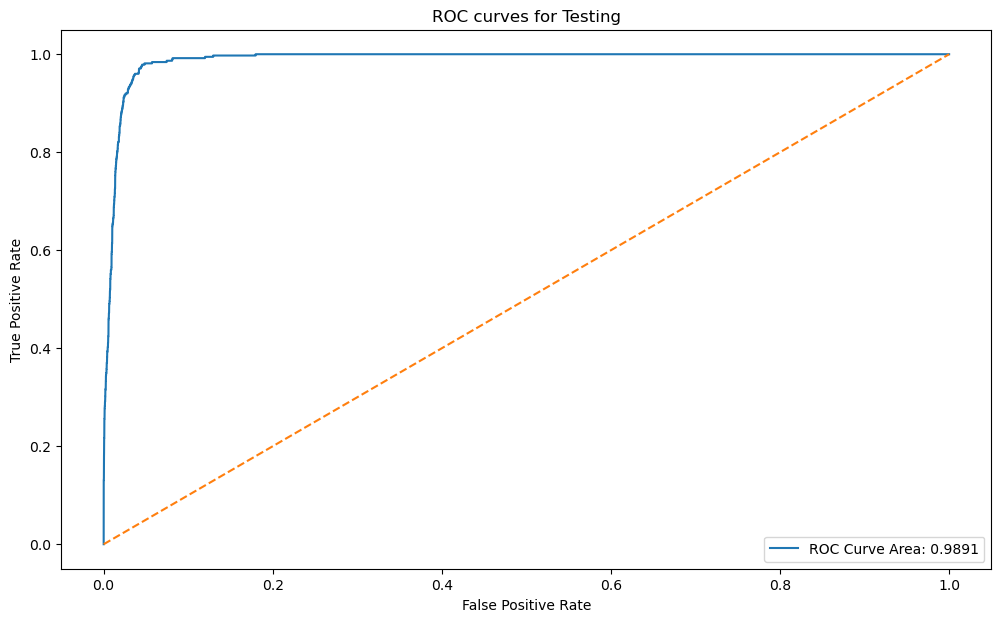

In [40]:
aps_test_predicted_response = RF_model.predict(imputed_aps_test_predictors)
aps_test_y_prob = RF_model.predict_proba(imputed_aps_test_predictors)
ModelSummary(aps_test_response, aps_test_predicted_response, aps_test_y_prob, "Testing")

In [41]:
# calculating Out of Bag Error
train_oob_error = 1 - RF_model.oob_score_
test_error = 1 - accuracy_score(aps_test_response, aps_test_predicted_response)

data = {
    'Training OOB Error': [round(train_oob_error, 4)],
    'Testing Error': [round(test_error, 4)]
}
data = pd.DataFrame(data=data)
data

,Training OOB Error,Testing Error
0,0.0424,0.0405


**Analysis-->**

As we see that our dataset is imbalanced, initially the model will predict majority of the samples as negative since we have more datapoints from negative class than positive class. Hence to achieve higher accuracy, the model predicts majority to be negative. This might be the reason that we can see that the case without compensation has a better overall performance. When the class weights are balanced, the model gives a significantly better performance and more accurate predictions for the positive class. As we can see in the confusion matrix, when the data had class imbalance, only 195 datapoints were correctly predicted to be in positive class against the 375 datapoints that accually belons to the positive class. After handling the class imbalance, we observe that 360 datapoints were predicted to be correctly classified as positive out of 375.

**1(e). XGBoost and Model Trees**  
**In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using $X_j > s$ as the decision rule, one has $\sum_{j}\beta_{j}X_j > s$. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use $L1$ penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine $\alpha$ (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets**

In [46]:
scaler = StandardScaler()
train_x_cols = imputed_aps_train_predictors.columns
test_x_cols = imputed_aps_test_predictors.columns
x_train = pd.DataFrame(scaler.fit_transform(imputed_aps_train_predictors),columns=train_x_cols)
x_test = pd.DataFrame(scaler.fit_transform(imputed_aps_test_predictors),columns=test_x_cols)

estimator = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, 
                          max_depth = 5,use_label_encoder=False)
parameter = {
    "reg_alpha": [0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
}

aps_test_response['class'].replace({'neg':0,'pos':1},inplace=True)
aps_train_response['class'].replace({'neg':0,'pos':1},inplace=True)

cross_validation = KFold(n_splits=5,shuffle=True,random_state=11)
grid_cv = GridSearchCV(estimator, parameter, n_jobs=-1, cv=cross_validation, scoring="accuracy")
grid_cv.fit(x_train, aps_train_response)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2,
                                       0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50,
                                       100, 200]},
             scoring='accuracy')

In [47]:
print('The best alpha is ',grid_cv.best_params_, ' with a cross validation accuracy of ',
      round(grid_cv.best_score_,4))

The best alpha is  {'reg_alpha': 0.07}  with a cross validation accuracy of  0.9941


In [48]:
alpha_to_use = grid_cv.best_params_['reg_alpha']
estimator = XGBClassifier(objective='binary:logistic', reg_alpha=alpha_to_use, colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, use_label_encoder=False,)
estimator.fit(x_train, aps_train_response)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score is: 0.9984


Confusion Matrix is: 
[[58995     5]
 [   92   908]]


ROC AUC Score is: 0.954




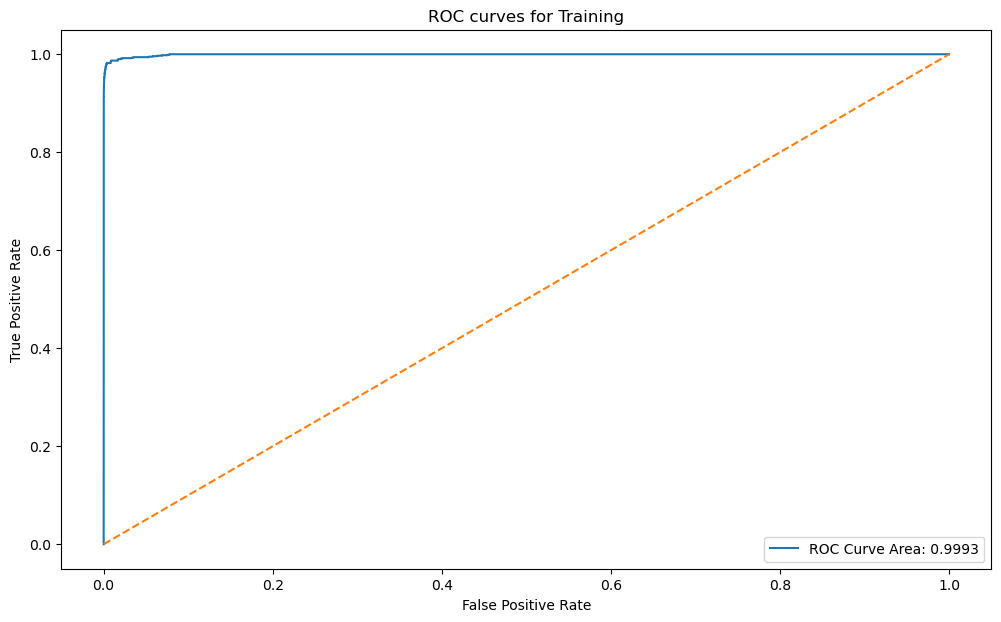

In [50]:
train_response_predicted = estimator.predict(x_train)
train_response_predicted_prob = estimator.predict_proba(x_train)

test_response_predicted = estimator.predict(x_test)
test_response_predicted_prob = estimator.predict_proba(x_test)

ModelSummary(aps_train_response.values, train_response_predicted, train_response_predicted_prob, 
             "Training", xgboost_mode=True)

Accuracy Score is: 0.9921


Confusion Matrix is: 
[[15600    25]
 [  101   274]]


ROC AUC Score is: 0.8645




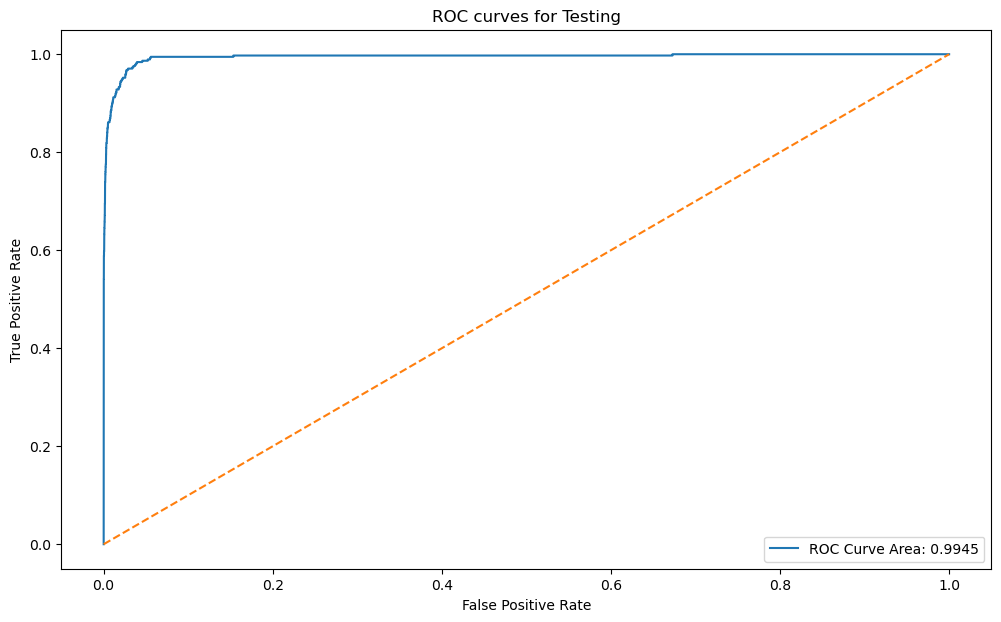

In [51]:
ModelSummary(aps_test_response, test_response_predicted, test_response_predicted_prob, 
             "Testing", xgboost_mode=True)

**1(f). Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with $L1$-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case**

In [52]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, aps_train_response)

data = {
    "Before SMOTE": aps_train_response.value_counts(),
    "After SMOTE": y_train_smote.value_counts()
}

dataframe = pd.DataFrame(data=data)
dataframe

,Before SMOTE,After SMOTE
class,,
0,59000,59000
1,1000,59000


In [53]:
cross_validation = KFold(n_splits=5,shuffle=True,random_state=11)
grid_smote = GridSearchCV(estimator, parameter, n_jobs=-1, cv=cross_validation, scoring="accuracy")
grid_smote.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2,
                                       0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50,
                                       100, 200]},
             scoring='accuracy')

In [ ]:
print('The best alpha is ',grid_smote.best_params_, ' with a cross validation accuracy of ',round(grid_smote.best_score_,4))

Accuracy Score is: 0.9982


Confusion Matrix is: 
[[58990    10]
 [   99   901]]


ROC AUC Score is: 0.9504




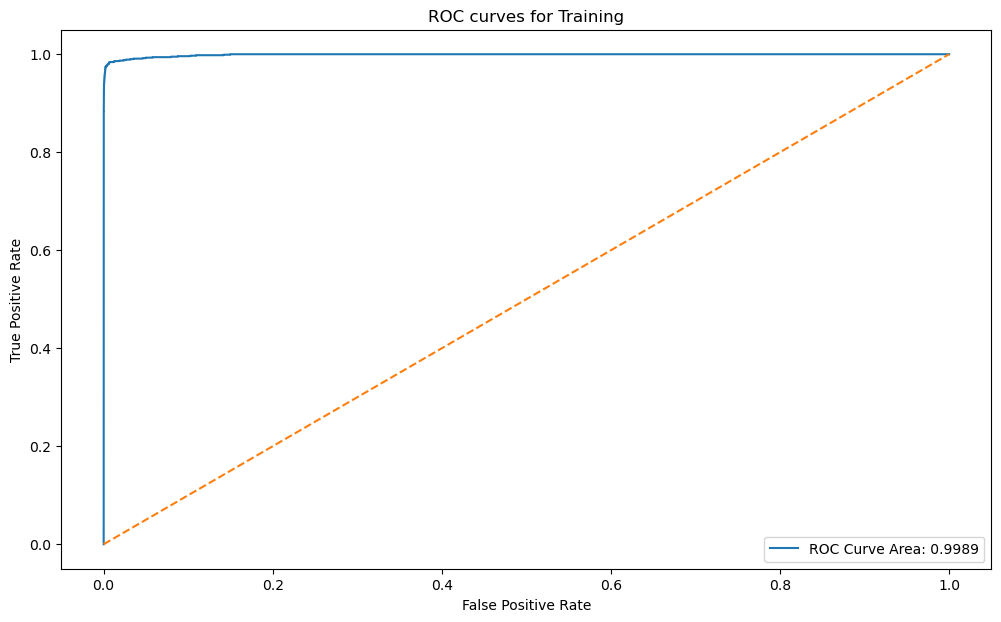

In [55]:
alpha_value = grid_smote.best_params_['reg_alpha']

estimator_smote = XGBClassifier(objective='binary:logistic', reg_alpha=alpha_value, colsample_bytree = 0.3, 
                                learning_rate = 0.1, max_depth = 5, use_label_encoder=False,)

estimator_smote.fit(x_train, aps_train_response)

train_response_predicted = estimator_smote.predict(x_train)
train_response_predicted_prob = estimator_smote.predict_proba(x_train)

test_response_predicted = estimator_smote.predict(x_test)
test_response_predicted_prob = estimator_smote.predict_proba(x_test)

ModelSummary(aps_train_response.values, train_response_predicted, train_response_predicted_prob, 
             "Training", xgboost_mode=True)

Accuracy Score is: 0.9918


Confusion Matrix is: 
[[15608    17]
 [  115   260]]


ROC AUC Score is: 0.8461




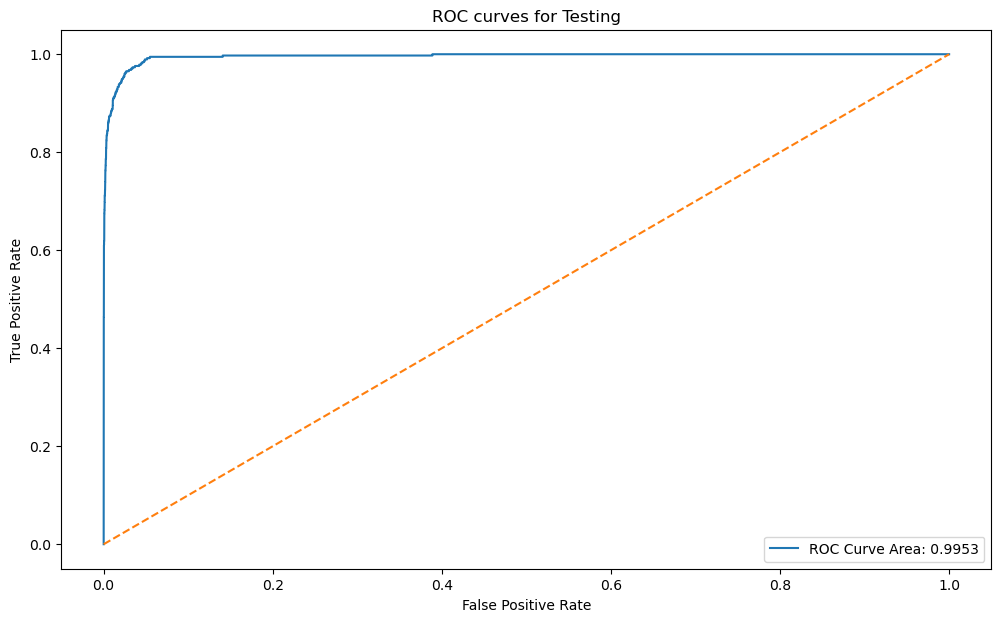

In [56]:
ModelSummary(aps_test_response, test_response_predicted, test_response_predicted_prob, "Testing", xgboost_mode=True)

### 2. ISLR 6.6.3

**Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.**

**(a) As we increase s from 0, the training RSS will:**
**i. Increase initially, and then eventually start decreasing in an inverted U shape.  
ii. Decrease initially, and then eventually start increasing in a U shape.  
iii. Steadily increase.  
iv. Steadily decrease.  
v. Remain constant.**

Ans: Steadily Decrease: For training set, The increasing of s is equivalent to increase the flexibility of the model, RSS will steadily decrease. The value of the estimated coefficients will go from 0 to their OLS value when the value of s increases. This is the reason that training RSS will decrease steadily.

**(b) Repeat (a) for test RSS.**  
Ans: Decrease Initially and then eventually starts increasing in a new shape. The test RSS will decrease to a certain level after which it will hit an inflection point and the test residual sum error will start to increase.

**(c) Repeat (a) for variance.**  
Ans: Steadily Increases: $\beta$ is almost zero in the beginning which would mean that there is almost no variance in the beginning. It is only after the module becomes flexible does the variance start to go up.

**(d) Repeat (a) for (squared) bias.**  
Ans: Steadily Decrease: Due to the bias-variance trade-off, since the variance is increasing, the bias will decrease.

**(e) Repeat (a) for the irreducible error.**  
Ans: Irreducible error is act of god and is present in any machine learning model that is built and hence it will remain constant.

### 3. ISLR 6.6.5

**It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that $n = 2, p = 2, x_{11} = x_{12}, x_{21} = x_{22}$. Furthermore, suppose that $y1 +y2 = 0$ and $x11 +x21 = 0$ and $x_{12} +x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\beta_0$ = 0.**

**a) Write out the ridge regression optimization problem in this setting.**

**b) Argue that in this setting, the ridge coefficient estimates satisfy $β_1 = β_2$.**

**c) Write out the lasso optimization problem in this setting.**

**d) Argue that in this setting, the lasso coefficients $β_1$ and $β_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.**

![](images/IMG6-6-5-1.jpg)

![](images/IMG6-6-5-2.jpg)

### 4. ISLR 8.4.5

**Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.  
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?**

Ans: **Majority Polling**: In this, probabilities >= 0.5 will be true and will be false otherwise. False = 4 and True = 6 and hence, the red samples are larger than green samples and so the classification will be **red class**.

Ans: **Average Probability**: Mean for given probabilities = 0.45 hence the final prediction is **green**.

### 5. ISLR 9.7.3

**Here we explore the maximal margin classifier on a toy data set.  
(a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label. Sketch the observations**

In [63]:
data={'X1':[3,2,4,1,2,4,4],'X2':[4,2,4,4,1,3,1],'Y':['red','red','red','red','blue','blue','blue']}
df = pd.DataFrame(data)
df

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


<Axes: xlabel='X1', ylabel='X2'>

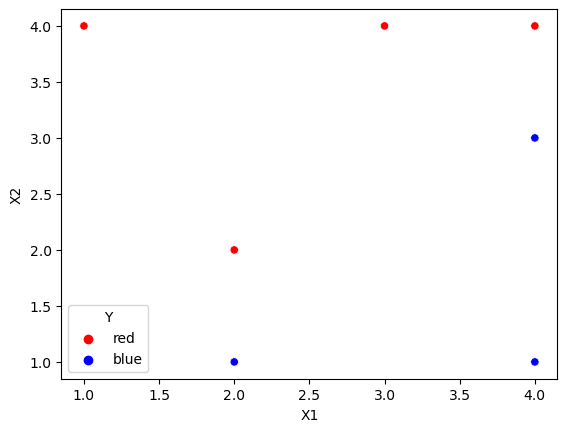

In [64]:
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", palette=['red', 'blue'])

In [65]:
df['Y'].replace({'red': 0, 'blue': 1}, inplace=True)
x_train = df.drop(['Y'], axis=1)
y_train = df['Y']
x_train

,X1,X2
0,3,4
1,2,2
2,4,4
3,1,4
4,2,1
5,4,3
6,4,1


In [66]:
y_train

0    0
1    0
2    0
3    0
4    1
5    1
6    1
Name: Y, dtype: int64

In [67]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1000)
model.fit(x_train, y_train)

SVC(C=1000, kernel='linear')

In [68]:
y_pred = model.predict(x_train)
y_pred

array([0, 0, 0, 0, 1, 1, 1])

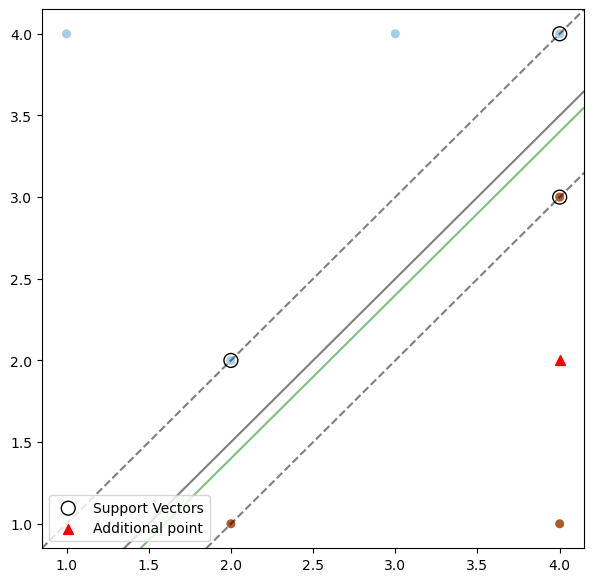

[-1.0004096] [[ 1.9998464 -1.9996928]]


In [69]:
sample_df = df

# plot graph
fig, ax = plt.subplots(figsize=(7, 7))

# scatter plot of sample points
ax.scatter(sample_df.iloc[:, 0], sample_df.iloc[:, 1], c=sample_df.iloc[:, -1], s=30, cmap=plt.cm.Paired)

# create a grid
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# hyperplane
lines1 = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], 
                    label="Decision Boundary")

# support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', 
           edgecolors='k', label="Support Vectors")

# a hyperplane that is not optimal
lines2 = ax.contour(XX, YY, Z - 0.2, colors='g', levels=[0], alpha=0.5, linestyles=['-'])

# point make the data NOT linear-separable
ax.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Additional point")

ax.legend()
plt.show()

print(model.intercept_, model.coef_)

**(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))**  
Ans: The solid black/grey line is the hyperplane

**(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1x_1 + \beta_2x_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0, \beta_1, and \beta_2$.**  
Ans: The parameters are as follows:  
$\beta_0 = 1$, $\beta_1 = -1$ and $\beta_2 = 2$  
$\beta_0 + \beta_1X_1 + \beta_2X_2 > 0$ => red, otherwise, blue

**(d) On your sketch, indicate the margin for the maximal margin hyperplane.**  
Ans: The dashed line indicates the maximal margin.

**(e) Indicate the support vectors for the maximal margin classifier.**  
Ans: The circled ones are the support vectors

**(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane**  
Ans: The seventh point is far away from the maximal margin hyperplane. If it is on the edge of the decision boundary, it will have effects, but it does not.

**(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.**  
Ans: The solid green line

**(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane**
Ans: The new point marked as a red triangle. This makes the points from an XOR pattern which is not linearly separable.